In [1]:
import numpy as np
from onset_detection import detected_samples
import matplotlib.pyplot as plt
import helper

from datetime import datetime

/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/GP_models/onset_detection.py:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wav.read(path)


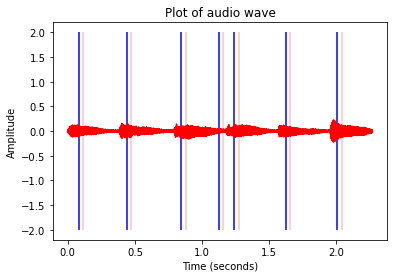

sorted time keys:  [13.5, 15.0, 49.0, 76, 97, 287.89, 9876, 12987.4]
scale frequencies:  [[262], [294], [330], [349], [392], [440], [494], [523]]
[262]
[294]
[330]
[349]
[392]
[440]
[494]
[523]


In [49]:

scale_dict = {13.5: [262], 15.0: [294], 49.0: [330], 76: [349], 97: [392], 287.89: [440], 9876: [494], 12987.4: [523]}  # Made up midi to chords file
sorted_time_keys = sorted(scale_dict.keys(), reverse=False)
scale = [scale_dict[key] for key in sorted_time_keys]

sample_data, sample_rate = detected_samples(
    '/Users/josephine/Documents/Engineering /Part IIB/Score alignment project/Score-follower/wav_files/scale.wav', sample_length=1500, offset=2000, show=True, delta=0.03, num_samples=100000)
plt.show()
time_samples = np.linspace(
    0, len(sample_data[0])/sample_rate, len(sample_data[0]))
prob_matrix = np.zeros((len(scale), len(sample_data)))

print('sorted time keys: ', sorted_time_keys)
print('scale frequencies: ' , scale)
for notes in scale:
    print(notes)

In [ ]:
def oltw(sample_data, scale, time_samples):
    note_num, audio_num = 0, 0
    path = []
    for sample in sample_data:
        min_val = np.inf
        current_notes_prob = helper.stable_nlml(time_samples=time_samples, Y=sample,  f=scale[note_num])
        next_notes_prob = helper.stable_nlml(time_samples=time_samples, Y=sample,  f=scale[note_num+1])
        next_next_notes_prob = helper.stable_nlml(time_samples=time_samples, Y=sample,  f=scale[note_num+2])
        if current_notes_prob < min_val:
            # Hasn't moved on
            min_val = current_notes_prob
            step = (note_num, audio_num+1)
        if next_notes_prob < min_val:
            # Has moved to next note
            min_val = next_notes_prob
            step = (note_num+1, audio_num+1)
        if next_next_notes_prob < min_val:
            # Has moved on to the next next one
            min_val = next_next_notes_prob
            step = (note_num+2, audio_num+1)
        note_num, audio_num = step
        path.append(step)
    return path

print(oltw(sample_data, scale, time_samples))

In [15]:
def lml_table(sample_data, scale):
    for i, sample in enumerate(sample_data):
        for j in range(len(scale)):
            prob_matrix[j, i] = helper.stable_nlml(time_samples, sample, f=scale[j])
    return prob_matrix

prob_mat = lml_table(sample_data, scale)

0it [00:00, ?it/s]

[ 0.0567028   0.05086007  0.04485551 ... -0.01319092 -0.00803298
 -0.00308495]


100%|██████████| 15/15 [00:00<00:00, 31.15it/s]
1it [00:00,  2.06it/s]
0it [00:00, ?it/s]

[ 0.0567028   0.05086007  0.04485551 ... -0.01319092 -0.00803298
 -0.00308495]


100%|██████████| 15/15 [00:00<00:00, 34.39it/s]
1it [00:00,  2.28it/s]
0it [00:00, ?it/s]

[ 0.0567028   0.05086007  0.04485551 ... -0.01319092 -0.00803298
 -0.00308495]


100%|██████████| 15/15 [00:00<00:00, 33.68it/s]
1it [00:00,  2.23it/s]
0it [00:00, ?it/s]

[ 0.0567028   0.05086007  0.04485551 ... -0.01319092 -0.00803298
 -0.00308495]


100%|██████████| 15/15 [00:00<00:00, 32.47it/s]
1it [00:00,  2.15it/s]
0it [00:00, ?it/s]

[-0.0021508  -0.00414113 -0.00619756 ...  0.00538485  0.00461123
  0.00406662]


100%|██████████| 15/15 [00:00<00:00, 36.56it/s]
1it [00:00,  2.42it/s]
0it [00:00, ?it/s]

[-0.0021508  -0.00414113 -0.00619756 ...  0.00538485  0.00461123
  0.00406662]


100%|██████████| 15/15 [00:00<00:00, 36.40it/s]
1it [00:00,  2.41it/s]
0it [00:00, ?it/s]

[-0.0021508  -0.00414113 -0.00619756 ...  0.00538485  0.00461123
  0.00406662]


100%|██████████| 15/15 [00:00<00:00, 34.02it/s]
1it [00:00,  2.25it/s]
0it [00:00, ?it/s]

[-0.0021508  -0.00414113 -0.00619756 ...  0.00538485  0.00461123
  0.00406662]


100%|██████████| 15/15 [00:00<00:00, 36.43it/s]
1it [00:00,  2.41it/s]
0it [00:00, ?it/s]

[ 0.00488705  0.01585832  0.02589735 ... -0.06215393 -0.05334185
 -0.04322193]


100%|██████████| 15/15 [00:00<00:00, 35.82it/s]
1it [00:00,  2.37it/s]
0it [00:00, ?it/s]

[ 0.00488705  0.01585832  0.02589735 ... -0.06215393 -0.05334185
 -0.04322193]


100%|██████████| 15/15 [00:00<00:00, 35.69it/s]
1it [00:00,  2.36it/s]
0it [00:00, ?it/s]

[ 0.00488705  0.01585832  0.02589735 ... -0.06215393 -0.05334185
 -0.04322193]


100%|██████████| 15/15 [00:00<00:00, 32.60it/s]
1it [00:00,  2.14it/s]
0it [00:00, ?it/s]

[ 0.00488705  0.01585832  0.02589735 ... -0.06215393 -0.05334185
 -0.04322193]


100%|██████████| 15/15 [00:00<00:00, 32.72it/s]
1it [00:00,  2.17it/s]
0it [00:00, ?it/s]

[0.068198   0.06382848 0.0582834  ... 0.08564028 0.08499559 0.08457639]


100%|██████████| 15/15 [00:00<00:00, 35.84it/s]
1it [00:00,  2.37it/s]
0it [00:00, ?it/s]

[0.068198   0.06382848 0.0582834  ... 0.08564028 0.08499559 0.08457639]


100%|██████████| 15/15 [00:00<00:00, 36.55it/s]
1it [00:00,  2.42it/s]
0it [00:00, ?it/s]

[0.068198   0.06382848 0.0582834  ... 0.08564028 0.08499559 0.08457639]


100%|██████████| 15/15 [00:00<00:00, 36.75it/s]
1it [00:00,  2.43it/s]
0it [00:00, ?it/s]

[0.068198   0.06382848 0.0582834  ... 0.08564028 0.08499559 0.08457639]


100%|██████████| 15/15 [00:00<00:00, 36.81it/s]
1it [00:00,  2.44it/s]
0it [00:00, ?it/s]

[ 0.01677044  0.01718609  0.0176674  ... -0.01906556 -0.02463407
 -0.02813427]


100%|██████████| 15/15 [00:00<00:00, 35.59it/s]
1it [00:00,  2.36it/s]
0it [00:00, ?it/s]

[ 0.01677044  0.01718609  0.0176674  ... -0.01906556 -0.02463407
 -0.02813427]


100%|██████████| 15/15 [00:00<00:00, 36.31it/s]
1it [00:00,  2.40it/s]
0it [00:00, ?it/s]

[ 0.01677044  0.01718609  0.0176674  ... -0.01906556 -0.02463407
 -0.02813427]


100%|██████████| 15/15 [00:00<00:00, 36.84it/s]
1it [00:00,  2.44it/s]
0it [00:00, ?it/s]

[ 0.01677044  0.01718609  0.0176674  ... -0.01906556 -0.02463407
 -0.02813427]


100%|██████████| 15/15 [00:00<00:00, 37.00it/s]
1it [00:00,  2.45it/s]
0it [00:00, ?it/s]

[-0.07092147 -0.07161049 -0.07386088 ... -0.03177359 -0.04132187
 -0.05019915]


100%|██████████| 15/15 [00:00<00:00, 34.87it/s]
1it [00:00,  2.31it/s]
0it [00:00, ?it/s]

[-0.07092147 -0.07161049 -0.07386088 ... -0.03177359 -0.04132187
 -0.05019915]


100%|██████████| 15/15 [00:00<00:00, 36.64it/s]
1it [00:00,  2.43it/s]
0it [00:00, ?it/s]

[-0.07092147 -0.07161049 -0.07386088 ... -0.03177359 -0.04132187
 -0.05019915]


100%|██████████| 15/15 [00:00<00:00, 36.14it/s]
1it [00:00,  2.39it/s]
0it [00:00, ?it/s]

[-0.07092147 -0.07161049 -0.07386088 ... -0.03177359 -0.04132187
 -0.05019915]


100%|██████████| 15/15 [00:00<00:00, 36.79it/s]
1it [00:00,  2.44it/s]


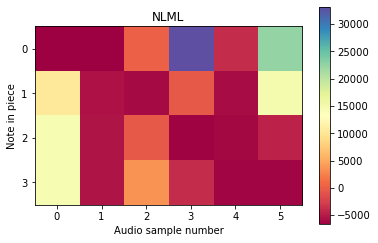

In [16]:
plt.imshow(prob_mat, cmap='Spectral', interpolation='nearest')
plt.title("NLML")
plt.colorbar()
plt.xlabel("Audio sample number")
plt.ylabel("Note in piece")
plt.yticks(range(len(prob_mat)))
plt.show()

In [17]:
print(prob_mat)

[[-6641.62772705 -6676.58125837   186.72302477 33156.84922748
  -3786.39894122 22443.81694993]
 [10455.07850761 -5572.921462   -6014.91598131  -406.43495516
  -5771.47186649 14935.46389152]
 [14375.19923678 -5330.91665192  -447.15618385 -6427.23487009
  -6132.09641231 -4354.08945841]
 [14464.86215519 -5332.09256669  3727.89786058 -3868.25721382
  -6262.02246184 -6228.59875011]]


In [20]:

def min_path(table):
    i, j = 0, 0
    path = [(i,j)]
    # While less than number of audio samples
    while i < table.shape[1]-2:
        minval = np.inf
        if table[i+1, j] < minval:
            minval = table[i+1, j]
            step = (i+1, j)
        if table[i+1, j+1] < minval:
            minval = table[i+1, j+1]
            step = (i+1, j+1)
        if table[i+1, j+2] < minval:
            minval = table[i+1, j+2]
            step = (i+1, j+2)
        path.append(step)
        i,j = step
    return np.array(path)

In [21]:
path = min_path(prob_mat)
print(path)

IndexError: index 4 is out of bounds for axis 0 with size 4